#### Sections

- Part 1: EDA
    - 1-1. Getting started
    - 1-2. Feature: Survived
    - 1-3. Relationship between age & survival rate
    - 1-4. Passanger class distribution
    - 1-5. Correlate the Class feature with the Age feature
    - 1-6. Feature: Embarked
    - 1-7. Correlate the Embarked feature with the Age feature
    - 1-8. Correlate the Embarked feature with the Class feature
    - 1-9. Feature: Gender
    - 1-10. Correlate the Class feature with the Survived feature
- Part 2: Test hypothesis
- Part 3: Clean data
- Part 4. Predict Logistic Regression
    - 4-1. Polynomial features
- Part 5. Predict Decision Tree

### Part 1: EDA

#### 1-1. Getting started

In [1]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data/train.csv', delimiter=',')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

#### 1-2. Feature: Survived
- 0: No
- 1: Yes

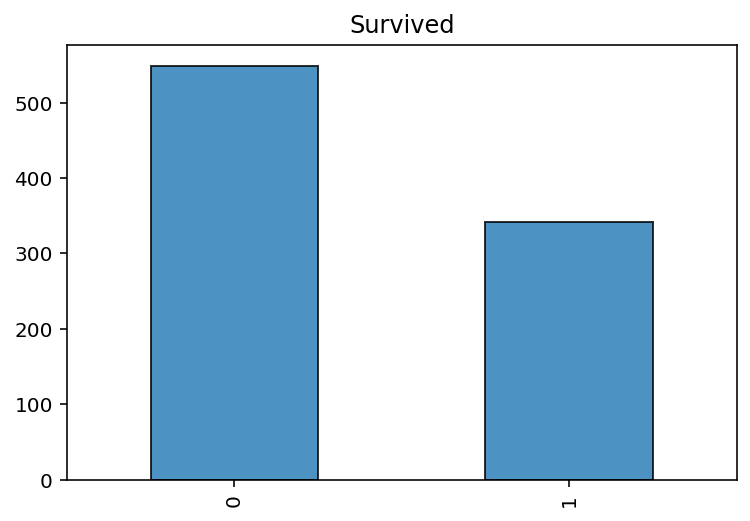

In [6]:
figure=plt.figure(figsize=(6, 4))
df.Survived.value_counts().plot(kind='bar', alpha=0.8, ec='black')
plt.title('Survived')
plt.show()

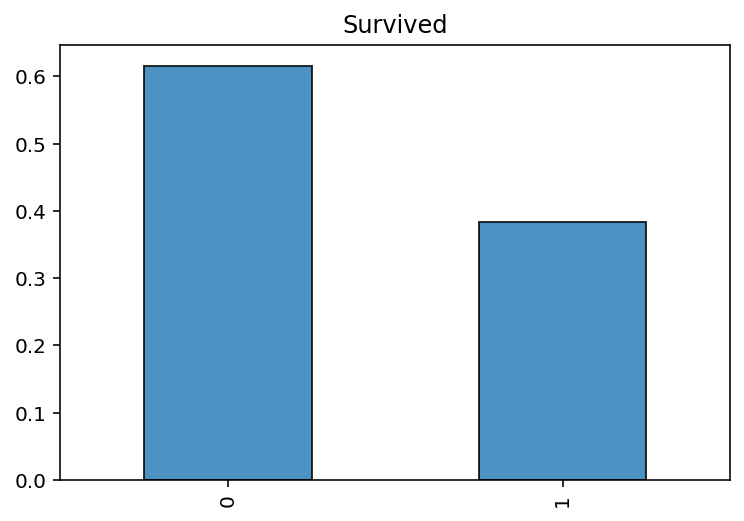

In [7]:
figure=plt.figure(figsize=(6, 4))
df.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.8, ec='black')
plt.title('Survived')
plt.show()

#### 1-3. Relationship between age & survival rate

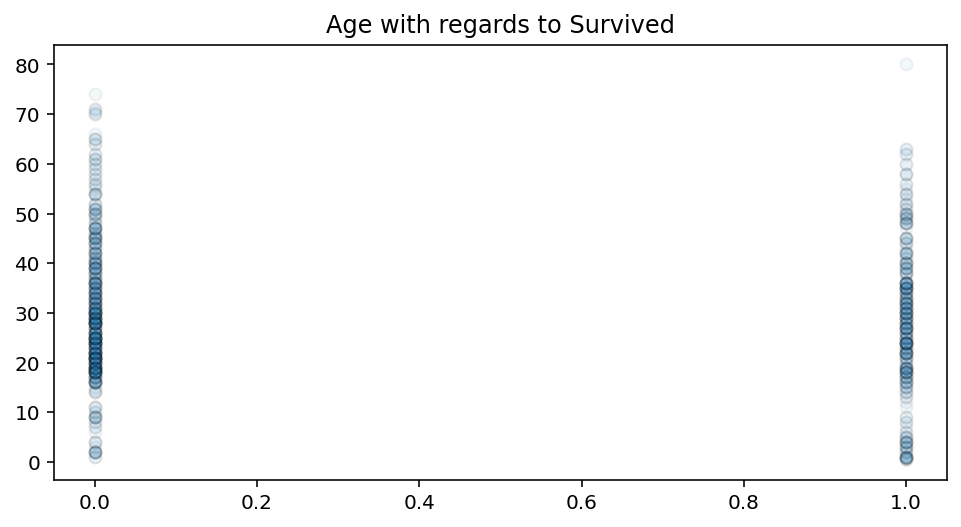

In [8]:
figure=plt.figure(figsize=(8, 4))
plt.scatter(df.Survived, df.Age, alpha=0.05, ec='black')
plt.title('Age with regards to Survived')
plt.show() 

#### 1-4. Passanger class distribution
- 1: First class
- 2: Second class
- 3: Third class

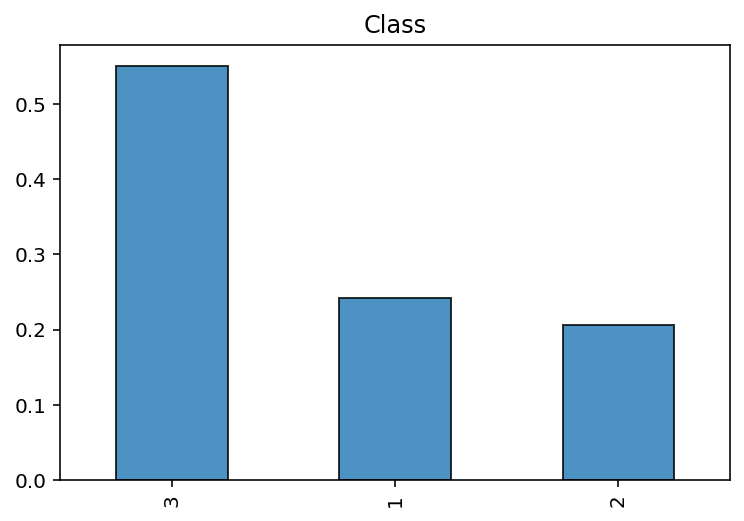

In [9]:
figure=plt.figure(figsize=(6, 4))
df.Pclass.value_counts(normalize=True).plot(kind='bar', alpha=0.8, ec='black')
plt.title('Class')
plt.show()

#### 1-5. Correlate the Class feature with the Age feature

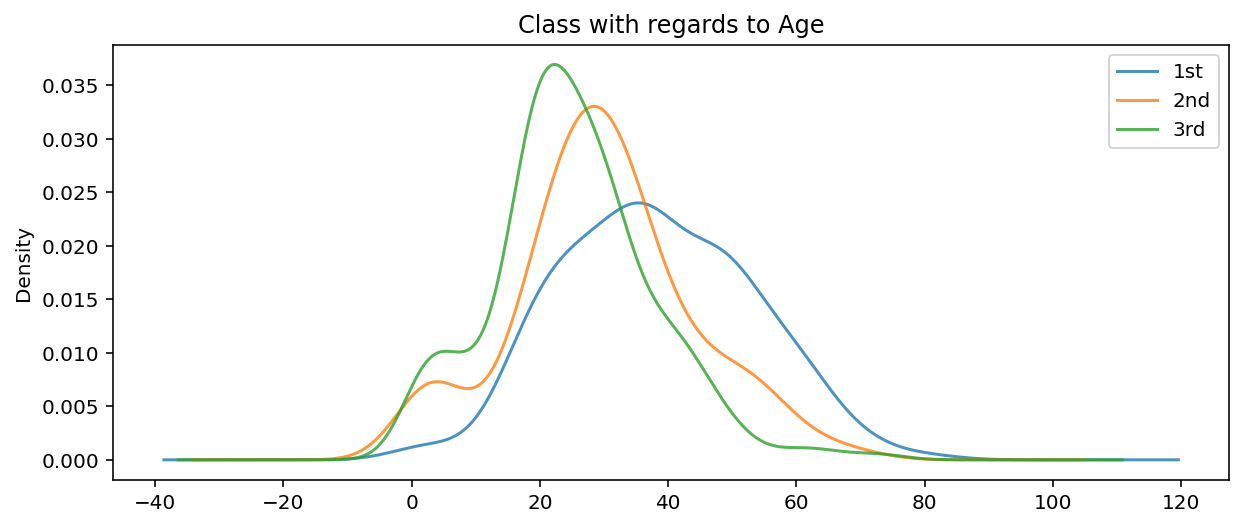

In [10]:
figure=plt.figure(figsize=(10, 4))
for i in [1,2,3]:
    df.Age[df.Pclass==i].plot(kind='kde', alpha=0.8)
plt.title('Class with regards to Age')
plt.legend(['1st', '2nd', '3rd'])
plt.show()

#### 1-6. Feature: Embarked
- S: Southampton
- C: Cherbourg
- Q: Queenstown

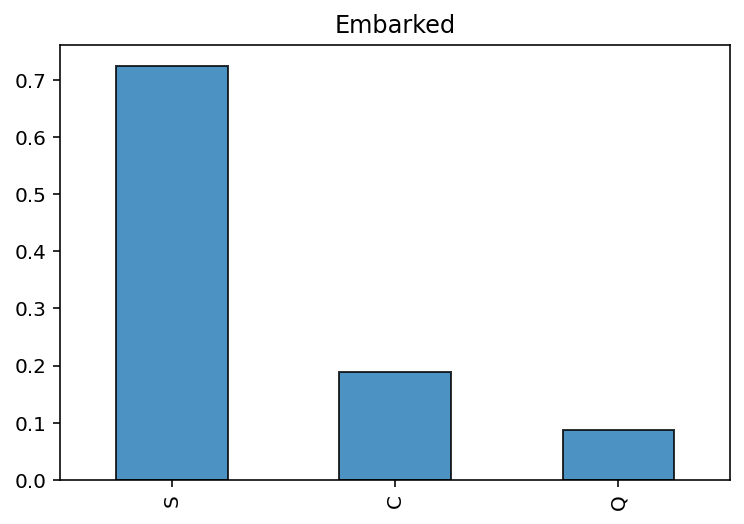

In [11]:
figure=plt.figure(figsize=(6, 4))
df.Embarked.value_counts(normalize=True).plot(kind='bar', alpha=0.8, ec='black')
plt.title('Embarked')
plt.show()

#### 1-7. Correlate the Embarked feature with the Age feature

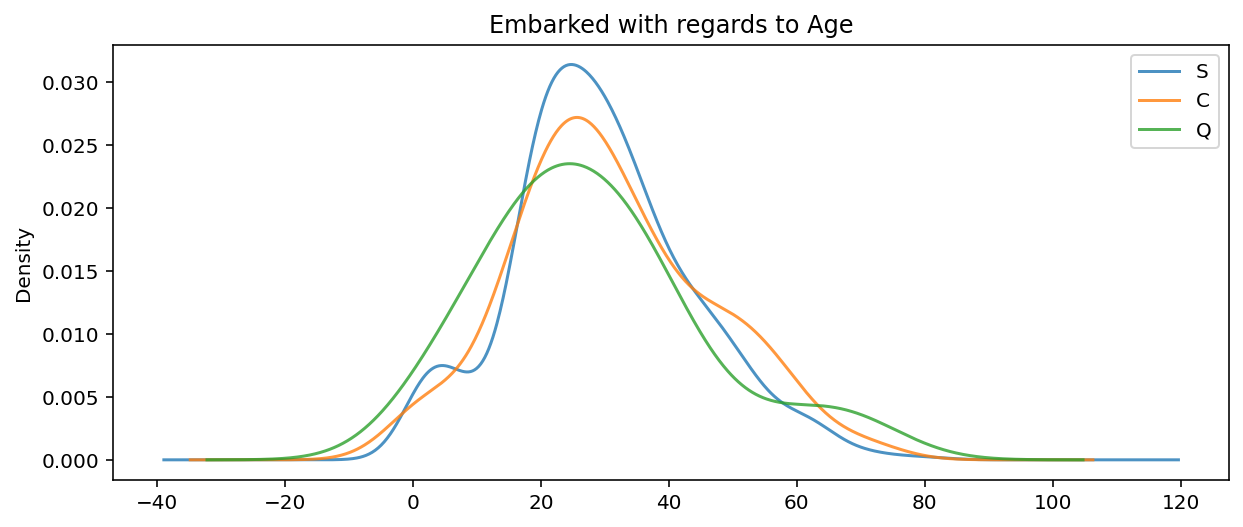

In [12]:
figure=plt.figure(figsize=(10, 4))
for i in ['S','C','Q']:
    df.Age[df.Embarked==i].plot(kind='kde', alpha=0.8)
plt.title('Embarked with regards to Age')
plt.legend(['S','C','Q'])
plt.show()

#### 1-8. Correlate the Embarked feature with the Class feature

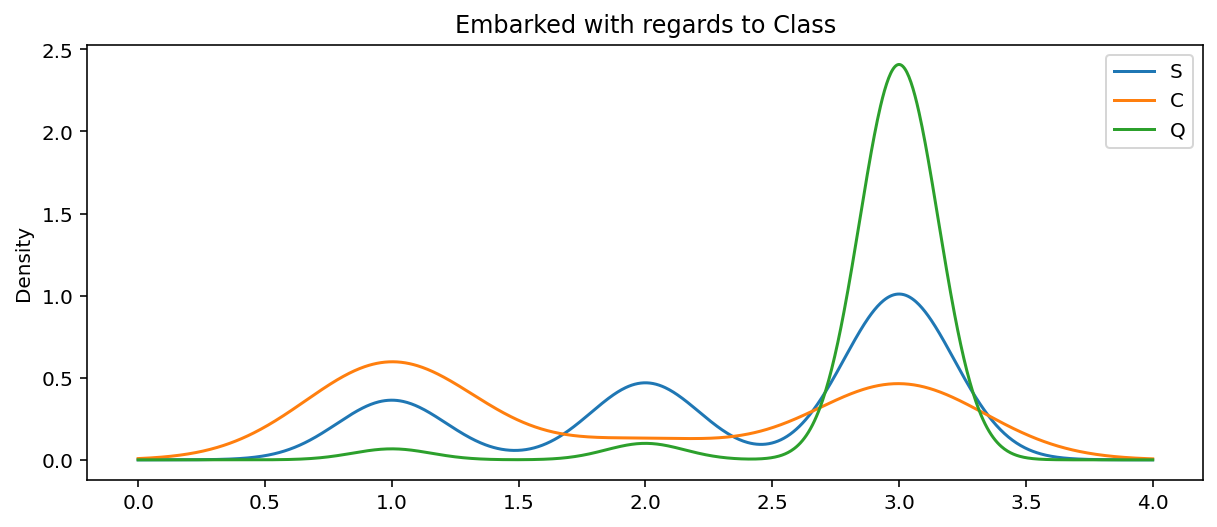

In [13]:
figure=plt.figure(figsize=(10, 4))
for i in ['S','C','Q']:
    df.Pclass[df.Embarked==i].plot(kind='kde')
plt.title('Embarked with regards to Class')
plt.legend(['S','C','Q'])
plt.show()

#### 1-9. Feature: Gender
- male (green)
- female (purple)

#### Correlate the Sex feature with the Survived feature

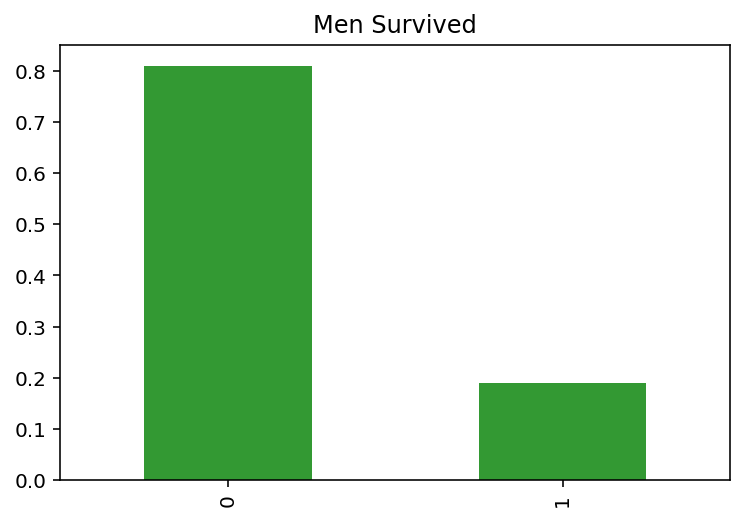

In [14]:
figure=plt.figure(figsize=(6, 4))
df.Survived[df.Sex == 'male'].value_counts(normalize=True).plot(kind='bar', alpha=0.8, color='green')
plt.title('Men Survived')
plt.show()

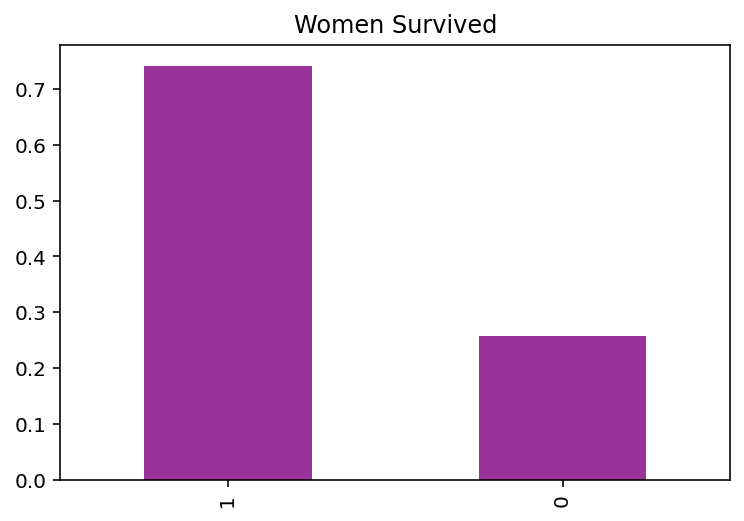

In [15]:
figure=plt.figure(figsize=(6, 4))
df.Survived[df.Sex == 'female'].value_counts(normalize=True).plot(kind='bar', alpha=0.8, color='purple')
plt.title('Women Survived')
plt.show()

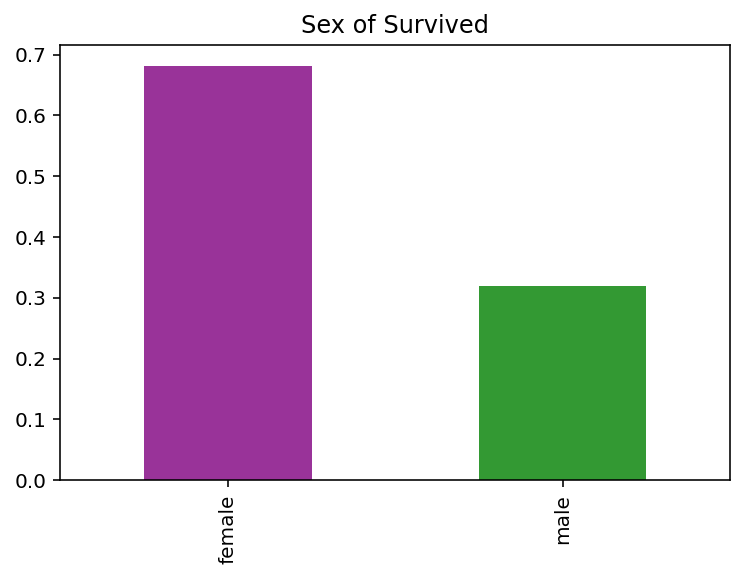

In [16]:
figure=plt.figure(figsize=(6, 4))
df.Sex[df.Survived == 1].value_counts(normalize=True).plot(kind='bar', alpha=0.8, color=['purple', 'green'])
plt.title('Sex of Survived')
plt.show()

#### 1-10. Correlate the Class feature with the Survived feature
- 0: No
- 1: Yes

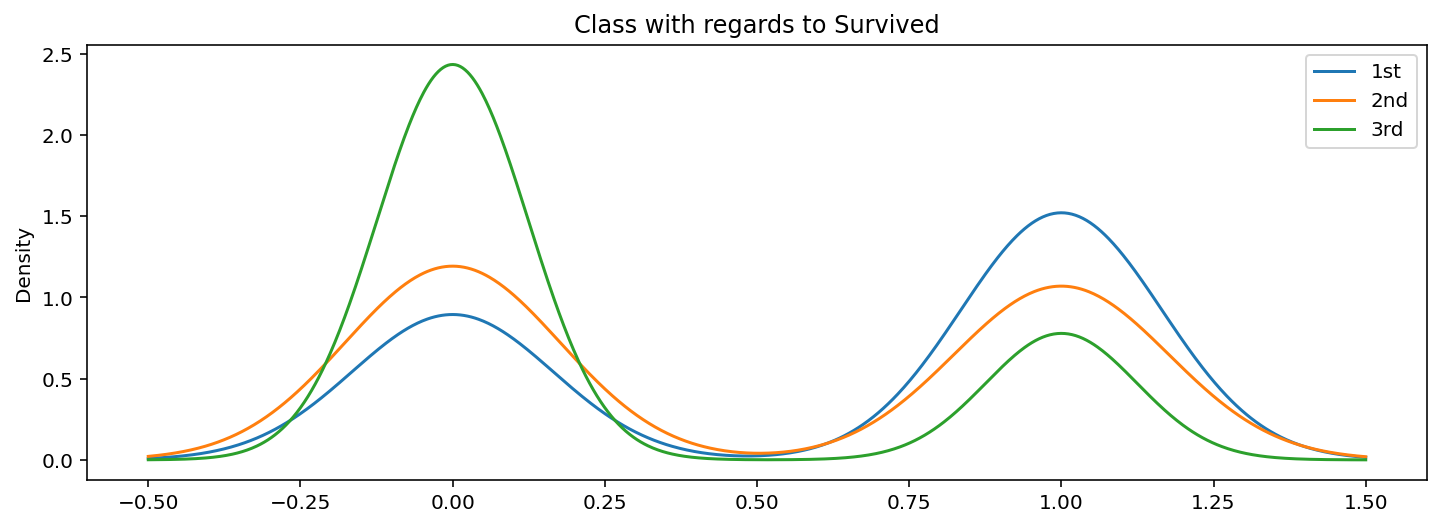

In [17]:
figure=plt.figure(figsize=(12, 4))
for i in [1,2,3]:
    df.Survived[df.Pclass==i].plot(kind='kde')
plt.title('Class with regards to Survived')
plt.legend(['1st', '2nd', '3rd'])
plt.show()

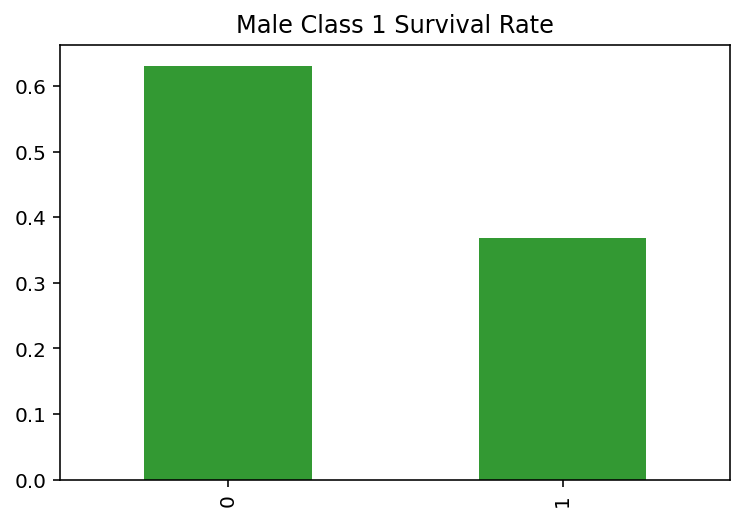

In [18]:
figure=plt.figure(figsize=(6, 4))
df.Survived[(df.Pclass==1) & (df.Sex=='male')].value_counts(normalize=True).plot(kind='bar', alpha=0.8, color='green')
plt.title('Male Class 1 Survival Rate')
plt.show()

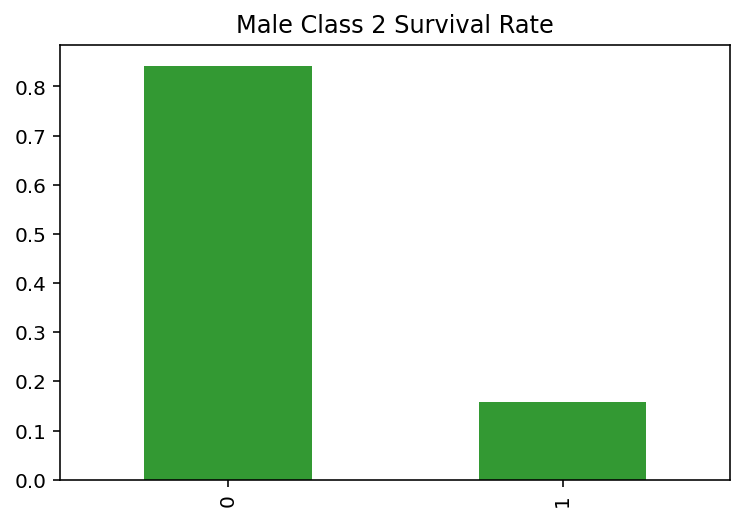

In [19]:
figure=plt.figure(figsize=(6, 4))
df.Survived[(df.Pclass==2) & (df.Sex=='male')].value_counts(normalize=True).plot(kind='bar', alpha=0.8, color='green')
plt.title('Male Class 2 Survival Rate')
plt.show()

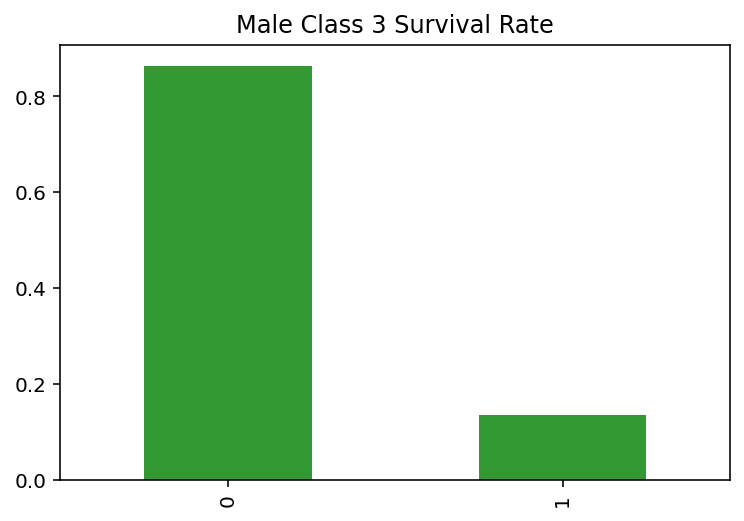

In [20]:
figure=plt.figure(figsize=(6, 4))
df.Survived[(df.Pclass==3) & (df.Sex=='male')].value_counts(normalize=True).plot(kind='bar', alpha=0.8, color='green')
plt.title('Male Class 3 Survival Rate')
plt.show()

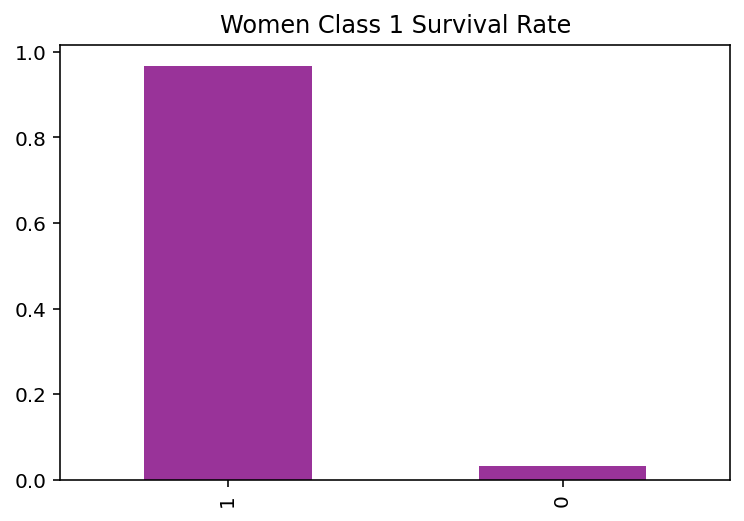

In [21]:
figure=plt.figure(figsize=(6, 4))
df.Survived[(df.Pclass==1) & (df.Sex=='female')].value_counts(normalize=True).plot(kind='bar', alpha=0.8, color='purple')
plt.title('Women Class 1 Survival Rate')
plt.show()

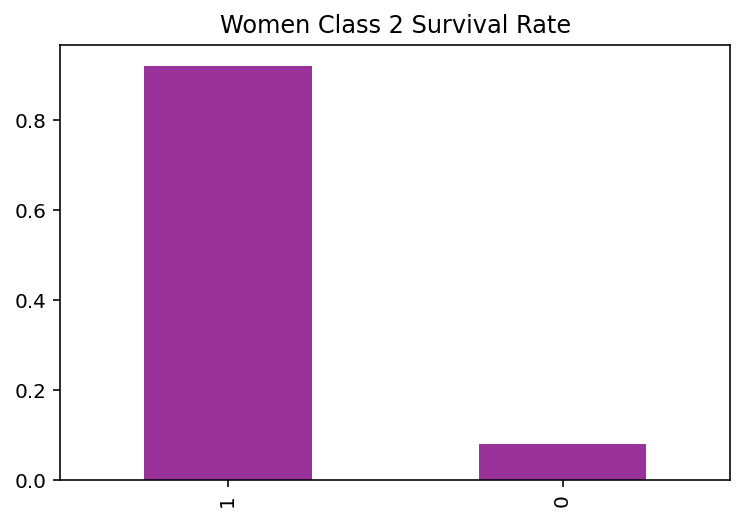

In [22]:
figure=plt.figure(figsize=(6, 4))
df.Survived[(df.Pclass==2) & (df.Sex=='female')].value_counts(normalize=True).plot(kind='bar', alpha=0.8, color='purple')
plt.title('Women Class 2 Survival Rate')
plt.show()

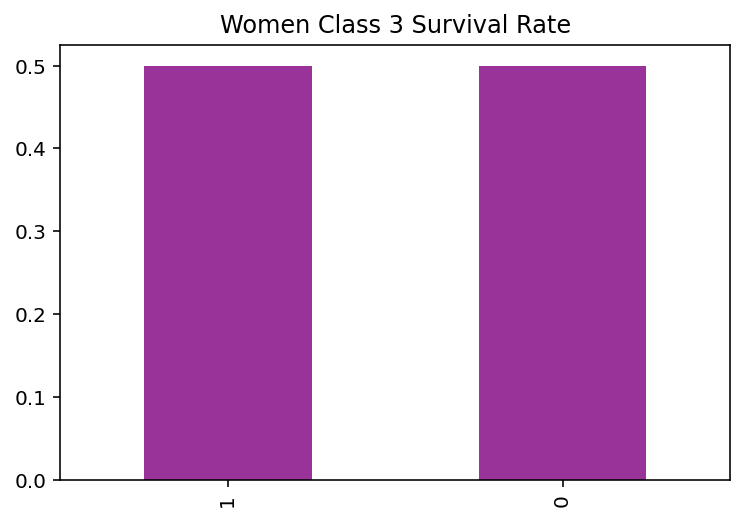

In [23]:
figure=plt.figure(figsize=(6, 4))
df.Survived[(df.Pclass==3) & (df.Sex=='female')].value_counts(normalize=True).plot(kind='bar', alpha=0.8, color='purple')
plt.title('Women Class 3 Survival Rate')
plt.show()

### Part 2: Test hypothesis
- hypothesis: if the passanger is female, they will survive.


- 0: No
- 1: Yes

In [24]:
train=pd.read_csv('data/train.csv')

In [25]:
train['Hypothesis'] = 0

In [26]:
train.loc[train.Sex=='female', 'Hypothesis'] = 1

In [27]:
train['Result'] = 0

In [28]:
train.loc[train.Survived == train.Hypothesis, 'Result'] = 1

In [29]:
# Check if hypothesis is correct
train['Result'].value_counts()

1    701
0    190
Name: Result, dtype: int64

In [30]:
train['Result'].value_counts(normalize=True)

1    0.786756
0    0.213244
Name: Result, dtype: float64

### Part 3: Clean data
- 0: Male
- 1: Female


- 0: South
- 1: Cherbourg
- 2: Queenstown

In [31]:
# Function
def cleanData(df):
    df['Fare']=df['Fare'].fillna(df['Fare'].dropna().median())
    df['Age']=df['Age'].fillna(df['Age'].dropna().median())
    
    df.loc[df['Sex']=='male', 'Sex'] = 0
    df.loc[df['Sex']=='female', 'Sex'] = 1
    
    df['Embarked'] = df['Embarked'].fillna('S')
    df.loc[df['Embarked']=='S', 'Embarked'] = 0
    df.loc[df['Embarked']=='C', 'Embarked'] = 1
    df.loc[df['Embarked']=='Q', 'Embarked'] = 2
    
# Call function
cleanData(train)

### Part 4. Predict Logistic Regression

In [32]:
from sklearn import linear_model

In [33]:
# Desired outcome
target = train['Survived'].values
pd.DataFrame(target).head()

,0
0,0
1,1
2,1
3,1
4,0


In [34]:
# Features
features = train[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch']].values
pd.DataFrame(features).head()

,0,1,2,3,4
0,3,22.0,0,1,0
1,1,38.0,1,1,0
2,3,26.0,1,0,0
3,1,35.0,1,1,0
4,3,35.0,0,0,0


In [35]:
classifier = linear_model.LogisticRegression()
classifierModel = classifier.fit(features, target)
classifierModel.score(features, target)

0.7912457912457912

#### 4-1. Polynomial features

In [36]:
from sklearn import preprocessing

In [37]:
poly = preprocessing.PolynomialFeatures(degree=2)
polyFeatures = poly.fit_transform(features)

In [38]:
classifierModel = classifier.fit(polyFeatures, target)
classifierModel.score(polyFeatures, target)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8249158249158249

### Part 5. Predict Decision Tree

In [39]:
from sklearn import tree, model_selection

In [40]:
target = train['Survived'].values
features = train[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch']].values

In [41]:
decisionTree = tree.DecisionTreeClassifier(random_state=1)
decisionTreeModel = decisionTree.fit(features, target)
decisionTreeModel.score(features, target)

0.9169472502805837

In [42]:
scores = model_selection.cross_val_score(decisionTree, features, target, scoring='accuracy', cv=50)
print(scores)
print('Mean:',scores.mean())

[0.77777778 0.72222222 0.77777778 0.88888889 0.77777778 0.77777778
 0.61111111 0.77777778 0.77777778 0.88888889 0.77777778 0.72222222
 0.77777778 0.77777778 0.77777778 0.77777778 0.94444444 0.83333333
 0.83333333 0.88888889 0.94444444 0.72222222 0.83333333 0.77777778
 0.72222222 0.83333333 0.83333333 0.88888889 0.55555556 0.83333333
 0.77777778 0.66666667 0.88888889 0.94444444 0.83333333 0.72222222
 0.66666667 0.72222222 0.83333333 0.88888889 0.88888889 0.82352941
 0.76470588 0.76470588 0.94117647 0.70588235 0.82352941 0.76470588
 0.76470588 0.88235294]
Mean: 0.7980392156862745


In [43]:
generalisedTree = tree.DecisionTreeClassifier(
    random_state=1,
    max_depth=7,
    min_samples_split=2
)

generalisedTreeModel = generalisedTree.fit(features, target)
generalisedTreeModel.score(features, target)

0.8529741863075196

In [44]:
scores = model_selection.cross_val_score(generalisedTree, features, target, scoring='accuracy', cv=50)
print(scores)
print('Mean:',scores.mean())

[0.88888889 0.72222222 0.77777778 0.94444444 0.72222222 0.83333333
 0.55555556 0.77777778 0.77777778 0.94444444 0.83333333 0.77777778
 0.83333333 0.77777778 0.66666667 0.66666667 0.94444444 0.77777778
 0.88888889 0.94444444 0.94444444 0.72222222 0.77777778 0.77777778
 0.77777778 0.77777778 0.83333333 0.83333333 0.61111111 0.88888889
 0.72222222 0.72222222 0.83333333 0.83333333 0.88888889 0.77777778
 0.72222222 0.77777778 0.77777778 0.77777778 0.83333333 0.88235294
 0.76470588 0.88235294 0.94117647 0.76470588 0.76470588 0.82352941
 0.94117647 0.88235294]
Mean: 0.8062745098039216


In [45]:
tree.export_graphviz(generalisedTreeModel, 
                     feature_names=['Pclass', 'Age', 'Sex', 'SibSp', 'Parch'], 
                     out_file='tree.dot')